In [2]:
import librosa
import soundfile
import seaborn
import os, glob, pickle
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing data, features were extracted in another script to a csv file

In [3]:
import pandas as pd
path = '/content/drive/MyDrive/emotion analysis/emotional_data.csv'
data = pd.read_csv(path)
print(data)

     Unnamed: 0   mfcc0mean      mfcc0var  ...  mfcc9mean    mfcc9var    y
0             0 -646.130310  36631.746094  ...  -2.075405  107.059120  3.0
1             1 -631.581116  34286.812500  ...  -1.056522  110.292526  3.0
2             2 -656.408325  33664.078125  ...  -2.994081  122.703697  3.0
3             3 -652.928711  38811.269531  ...  -3.219101  128.831512  3.0
4             4 -596.791260  36425.089844  ...  -8.588349  157.763321  3.0
..          ...         ...           ...  ...        ...         ...  ...
763         763 -537.174927  32594.867188  ...  -2.256565  118.073402  6.0
764         764 -426.846283  20284.859375  ...   0.745503  136.302719  6.0
765         765 -476.993042  19156.449219  ...  -3.960705   89.316643  6.0
766         766 -455.009979  20322.203125  ...   2.547016  214.800552  6.0
767         767 -437.571106  23304.939453  ...   3.988705  131.432602  6.0

[768 rows x 28 columns]


In [4]:
x = data.iloc[:, 1:-2]
y = data[['y']]
print(x)
print(y)

      mfcc0mean      mfcc0var  mfcc10mean  ...  mfcc8mean    mfcc8var  mfcc9mean
0   -646.130310  36631.746094   -1.588587  ... -11.837653  287.862701  -2.075405
1   -631.581116  34286.812500   -0.162012  ... -13.980430  407.221466  -1.056522
2   -656.408325  33664.078125    2.057793  ... -14.088727  295.278351  -2.994081
3   -652.928711  38811.269531    0.240284  ... -13.817194  367.334320  -3.219101
4   -596.791260  36425.089844   -1.057006  ... -11.485936  198.528595  -8.588349
..          ...           ...         ...  ...        ...         ...        ...
763 -537.174927  32594.867188   -7.259454  ...  -5.775849  219.336166  -2.256565
764 -426.846283  20284.859375   -0.901244  ... -11.093510  214.396973   0.745503
765 -476.993042  19156.449219   -7.573741  ...  -9.876807  212.346039  -3.960705
766 -455.009979  20322.203125    0.299338  ... -12.002703  281.913727   2.547016
767 -437.571106  23304.939453    4.320174  ... -12.128214  324.795197   3.988705

[768 rows x 25 columns]
   

Normalizing the data

In [5]:
from sklearn import preprocessing

def normalize(x):
  x = x.values  # returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  X_norm = pd.DataFrame(x_scaled)
  return X_norm



In [6]:
normalized_x = normalize(x)
print(normalized_x)

           0         1         2   ...        22        23        24
0    0.360674  0.630086  0.562810  ...  0.439251  0.419623  0.391160
1    0.387877  0.564488  0.613485  ...  0.362628  0.625096  0.414439
2    0.341457  0.547068  0.692336  ...  0.358756  0.432389  0.370171
3    0.347963  0.691056  0.627775  ...  0.368465  0.556431  0.365030
4    0.452925  0.624305  0.581693  ...  0.451828  0.265837  0.242356
..        ...       ...       ...  ...       ...       ...       ...
763  0.564391  0.517157  0.361370  ...  0.656014  0.301657  0.387021
764  0.770675  0.172795  0.587226  ...  0.465861  0.293154  0.455611
765  0.676914  0.141228  0.350206  ...  0.509369  0.289623  0.348086
766  0.718017  0.173839  0.629873  ...  0.433349  0.409382  0.496771
767  0.750623  0.257279  0.772700  ...  0.428861  0.483201  0.529709

[768 rows x 25 columns]


In [7]:
from sklearn.model_selection import train_test_split
import math
x_train,x_test,y_train,y_test = train_test_split(normalized_x, y, test_size=0.3, shuffle=True)


Let's have a look on our data with PCA

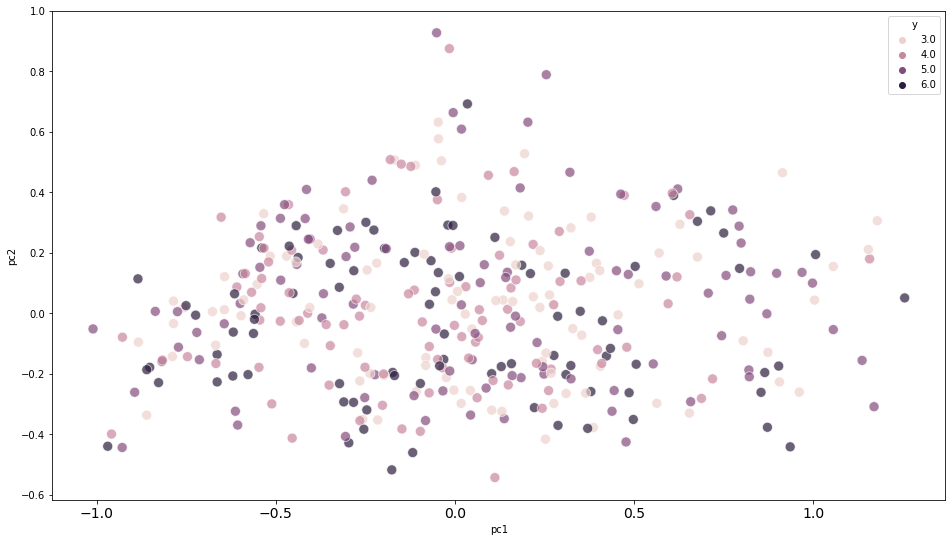

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns
from matplotlib import pyplot as plt
pca = PCA(n_components=2)
pc = pca.fit_transform(x_train)  
pc_df = pd.DataFrame(data = pc, columns = ['pc1', 'pc2'])
final_data_frame = pd.concat([pc_df, y_train], axis = 1)
plt.figure(figsize = (16, 9))
sns.scatterplot(x="pc1", y="pc2", data=final_data_frame, hue="y", alpha=0.7, s=100);
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

May be we can have a better look in 3D

Training KNN

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = round(math.sqrt(537)/2)
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(x_train,y_train.values.ravel())
print(knn.score(x_test,y_test))

0.6883116883116883


It's not optimal or good for production, but it's better than taking a guess

SVM for Multiclass (Scikit Learn implementation uses one vs one approach
First we'll try linear kernel

In [9]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
lin_svc = LinearSVC()
lin_svc.fit(x_train,y_train.values.ravel())
print(lin_svc.score(x_test,y_test))

0.6536796536796536


RBF kernel

In [10]:
rbf_svc =SVC()
rbf_svc.fit(x_train,y_train.values.ravel())
print(rbf_svc.score(x_test,y_test))

0.70995670995671


RBF is a non linear classifier and therefore we can see some improvement in the results

In [11]:
poly_svc = SVC(kernel='poly')
poly_svc.fit(x_train, y_train.values.ravel())
print(poly_svc.score(x_test,y_test))

0.7272727272727273


And the winning kernel is....
Polynomial Kernel

MultiLayer Perceptron - Deep Neural Network

In [ ]:
mlp_model=MLPClassifier(alpha=0.01, epsilon=1e-08, hidden_layer_sizes=(500,), learning_rate='adaptive', max_iter=10000)
mlp_model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(alpha=0.01, hidden_layer_sizes=(500,), learning_rate='adaptive',
              max_iter=10000)

In [ ]:
print(mlp_model.score(x_test,y_test))

0.7489177489177489


In [153]:
mlp_model=MLPClassifier(alpha=0.01, epsilon=1e-08, hidden_layer_sizes=(600,500,400,300), learning_rate='adaptive', max_iter=10000)
mlp_model.fit(x_train,y_train)
print(mlp_model.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7792207792207793


Adaboost Clasiifier

In [12]:
from sklearn.ensemble import AdaBoostClassifier
adbst_classifier = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
adbst_classifier.fit(x_train,y_train)
print(adbst_classifier.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5367965367965368


Emotion Intensity

In [11]:
import pandas as pd
path = '/content/drive/MyDrive/emotion analysis/data_strength.csv'
data = pd.read_csv(path)
print(data)

      Unnamed: 0   mfcc0mean      mfcc0var  ...  mfcc9mean    mfcc9var    y
0              0 -697.984192  33403.417969  ...  -2.524927   74.715950  1.0
1              1 -693.069763  34133.593750  ...  -0.993780   67.129990  1.0
2              2 -691.770142  36118.589844  ...  -3.344197   80.154922  1.0
3              3 -685.237915  33945.070312  ...  -2.946320   70.905792  1.0
4              4 -727.317932  33309.933594  ...  -4.470084   81.703636  1.0
...          ...         ...           ...  ...        ...         ...  ...
1435        1435 -586.762695  33574.347656  ...  -6.893698   91.481361  1.0
1436        1436 -532.757446  35833.515625  ...  -3.168304  105.778252  2.0
1437        1437 -541.550232  36588.097656  ...  -0.318764   81.114075  2.0
1438        1438 -492.985962  38512.945312  ...  -4.018751  147.492828  2.0
1439        1439 -518.293823  33614.339844  ...  -1.564242  103.520714  2.0

[1440 rows x 28 columns]


In [12]:
x = data.iloc[:, 1:-2]
y = data[['y']]
print(x)
print(y)

       mfcc0mean      mfcc0var  mfcc10mean  ...  mfcc8mean    mfcc8var  mfcc9mean
0    -697.984192  33403.417969    0.496105  ... -11.305533  299.316803  -2.524927
1    -693.069763  34133.593750    0.494107  ... -11.981820  303.310242  -0.993780
2    -691.770142  36118.589844    0.264550  ... -10.638001  287.102600  -3.344197
3    -685.237915  33945.070312    0.895644  ... -10.671633  218.365448  -2.946320
4    -727.317932  33309.933594    0.639894  ... -10.113079  192.036972  -4.470084
...          ...           ...         ...  ...        ...         ...        ...
1435 -586.762695  33574.347656   -8.886349  ...  -6.811911  176.340927  -6.893698
1436 -532.757446  35833.515625   -9.269098  ...  -8.727761  189.047867  -3.168304
1437 -541.550232  36588.097656   -6.635955  ...  -7.334210  214.224899  -0.318764
1438 -492.985962  38512.945312   -6.121341  ...  -1.773707  124.508644  -4.018751
1439 -518.293823  33614.339844   -8.032579  ...  -8.602053  359.500244  -1.564242

[1440 rows x 25

In [13]:
normalized_x = normalize(x)
print(normalized_x)

            0         1         2   ...        22        23        24
0     0.277085  0.539776  0.580216  ...  0.412196  0.439341  0.380890
1     0.286107  0.560202  0.580151  ...  0.390445  0.446216  0.415872
2     0.288492  0.615731  0.572722  ...  0.433666  0.418315  0.362171
3     0.300484  0.554928  0.593146  ...  0.432584  0.299985  0.371262
4     0.223234  0.537161  0.584869  ...  0.450549  0.254662  0.336448
...        ...       ...       ...  ...       ...       ...       ...
1435  0.481264  0.544558  0.276578  ...  0.556724  0.227641  0.281074
1436  0.580406  0.607756  0.264191  ...  0.495105  0.249516  0.366190
1437  0.564265  0.628865  0.349406  ...  0.539926  0.292858  0.431295
1438  0.653419  0.682711  0.366060  ...  0.718768  0.138413  0.346760
1439  0.606959  0.545676  0.304208  ...  0.499148  0.542945  0.402839

[1440 rows x 25 columns]


In [14]:
x_train,x_test,y_train,y_test = train_test_split(normalized_x, y, test_size=0.3, shuffle=True)
print(x_train.shape)

(1008, 25)


In [42]:
print(y_train[200:400])

        y
19    2.0
1183  2.0
611   2.0
288   2.0
160   2.0
...   ...
843   1.0
1300  2.0
1212  1.0
1369  2.0
745   2.0

[200 rows x 1 columns]


Trying to understand the data with PCA

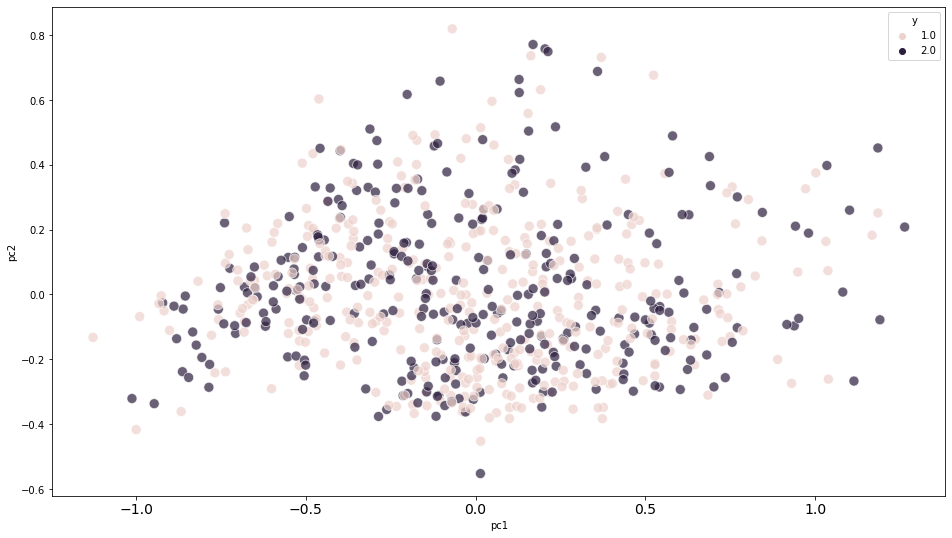

In [15]:
pca = PCA(n_components=2)
pc = pca.fit_transform(x_train)  
pc_df = pd.DataFrame(data = pc, columns = ['pc1', 'pc2'])
final_data_frame = pd.concat([pc_df, y_train], axis = 1)
plt.figure(figsize = (16, 9))
sns.scatterplot(x="pc1", y="pc2", data=final_data_frame, hue="y", alpha=0.7, s=100);
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.show()

KNN

In [166]:
import math
neighbors = round(math.sqrt(1008)/2)
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(x_train,y_train.values.ravel())
print(knn.score(x_test,y_test))

0.7245370370370371


Linear SVM

In [168]:
lin_svc = LinearSVC()
lin_svc.fit(x_train,y_train.values.ravel())
print(lin_svc.score(x_test,y_test))

0.75


Polynomial SVM

In [167]:
poly_svc = SVC(kernel='poly')
poly_svc.fit(x_train, y_train.values.ravel())
print(poly_svc.score(x_test,y_test))

0.7916666666666666


Adaboost

In [169]:
adbst_classifier = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
adbst_classifier.fit(x_train,y_train)
print(adbst_classifier.score(x_test,y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7314814814814815


MLP

In [171]:
mlp_model=MLPClassifier(alpha=0.01, epsilon=1e-08, hidden_layer_sizes=(600,500,400,300), learning_rate='adaptive', max_iter=10000)
mlp_model.fit(x_train,y_train)
print(mlp_model.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7708333333333334


Trying with 20 mfcc

In [172]:
path = '/content/drive/MyDrive/emotion analysis/data_20.csv'
data = pd.read_csv(path)
print(data)

     Unnamed: 0   mfcc0mean      mfcc0var  ...  mfcc9mean    mfcc9var    y
0             0 -646.130310  36631.746094  ...  -2.075405  107.059120  3.0
1             1 -631.581116  34286.812500  ...  -1.056522  110.292526  3.0
2             2 -656.408325  33664.078125  ...  -2.994081  122.703697  3.0
3             3 -652.928711  38811.269531  ...  -3.219101  128.831512  3.0
4             4 -596.791260  36425.089844  ...  -8.588349  157.763321  3.0
..          ...         ...           ...  ...        ...         ...  ...
763         763 -537.174927  32594.867188  ...  -2.256565  118.073402  6.0
764         764 -426.846283  20284.859375  ...   0.745503  136.302719  6.0
765         765 -476.993042  19156.449219  ...  -3.960705   89.316643  6.0
766         766 -455.009979  20322.203125  ...   2.547016  214.800552  6.0
767         767 -437.571106  23304.939453  ...   3.988705  131.432602  6.0

[768 rows x 42 columns]


In [173]:
x = data.iloc[:, 1:-2]
y = data[['y']]
print(x)
print(y)

      mfcc0mean      mfcc0var  mfcc10mean  ...  mfcc8mean    mfcc8var  mfcc9mean
0   -646.130310  36631.746094   -1.588587  ... -11.837653  287.862701  -2.075405
1   -631.581116  34286.812500   -0.162012  ... -13.980430  407.221466  -1.056522
2   -656.408325  33664.078125    2.057793  ... -14.088727  295.278351  -2.994081
3   -652.928711  38811.269531    0.240284  ... -13.817194  367.334320  -3.219101
4   -596.791260  36425.089844   -1.057006  ... -11.485936  198.528595  -8.588349
..          ...           ...         ...  ...        ...         ...        ...
763 -537.174927  32594.867188   -7.259454  ...  -5.775849  219.336166  -2.256565
764 -426.846283  20284.859375   -0.901244  ... -11.093510  214.396973   0.745503
765 -476.993042  19156.449219   -7.573741  ...  -9.876807  212.346039  -3.960705
766 -455.009979  20322.203125    0.299338  ... -12.002703  281.913727   2.547016
767 -437.571106  23304.939453    4.320174  ... -12.128214  324.795197   3.988705

[768 rows x 39 columns]
   

In [186]:
normaliz_x = normalize(x)
x_train,x_test,y_train,y_test = train_test_split(normaliz_x, y, test_size=0.3, shuffle=True)


Polynomial SVM

In [176]:
poly_svc = SVC(kernel='poly')
poly_svc.fit(x_train, y_train.values.ravel())
print(poly_svc.score(x_test,y_test))

0.7359307359307359


MLP

In [187]:
mlp_model=MLPClassifier(alpha=0.01, epsilon=1e-08, hidden_layer_sizes=(300,200,100), learning_rate='adaptive', max_iter=10000)
mlp_model.fit(x_train,y_train)
print(mlp_model.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7878787878787878


KNN

In [192]:
neighbors = round(math.sqrt(537))
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(x_train,y_train.values.ravel())
print(knn.score(x_test,y_test))

0.6060606060606061


Adaboost

In [193]:
adbst_classifier = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
adbst_classifier.fit(x_train,y_train)
print(adbst_classifier.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5974025974025974


Strength of the Emotion with 20 mfcc

In [194]:
path = '/content/drive/MyDrive/emotion analysis/data_strength_20.csv'
data = pd.read_csv(path)
print(data)

      Unnamed: 0   mfcc0mean      mfcc0var  ...  mfcc9mean    mfcc9var    y
0              0 -697.984192  33403.417969  ...  -2.524927   74.715950  1.0
1              1 -693.069763  34133.593750  ...  -0.993780   67.129990  1.0
2              2 -691.770142  36118.589844  ...  -3.344197   80.154922  1.0
3              3 -685.237915  33945.070312  ...  -2.946320   70.905792  1.0
4              4 -727.317932  33309.933594  ...  -4.470084   81.703636  1.0
...          ...         ...           ...  ...        ...         ...  ...
1435        1435 -586.762695  33574.347656  ...  -6.893698   91.481361  1.0
1436        1436 -532.757446  35833.515625  ...  -3.168304  105.778252  2.0
1437        1437 -541.550232  36588.097656  ...  -0.318764   81.114075  2.0
1438        1438 -492.985962  38512.945312  ...  -4.018751  147.492828  2.0
1439        1439 -518.293823  33614.339844  ...  -1.564242  103.520714  2.0

[1440 rows x 42 columns]


In [195]:
x = data.iloc[:, 1:-2]
y = data[['y']]
print(x)
print(y)

       mfcc0mean      mfcc0var  mfcc10mean  ...  mfcc8mean    mfcc8var  mfcc9mean
0    -697.984192  33403.417969    0.496105  ... -11.305533  299.316803  -2.524927
1    -693.069763  34133.593750    0.494107  ... -11.981820  303.310242  -0.993780
2    -691.770142  36118.589844    0.264550  ... -10.638001  287.102600  -3.344197
3    -685.237915  33945.070312    0.895644  ... -10.671633  218.365448  -2.946320
4    -727.317932  33309.933594    0.639894  ... -10.113079  192.036972  -4.470084
...          ...           ...         ...  ...        ...         ...        ...
1435 -586.762695  33574.347656   -8.886349  ...  -6.811911  176.340927  -6.893698
1436 -532.757446  35833.515625   -9.269098  ...  -8.727761  189.047867  -3.168304
1437 -541.550232  36588.097656   -6.635955  ...  -7.334210  214.224899  -0.318764
1438 -492.985962  38512.945312   -6.121341  ...  -1.773707  124.508644  -4.018751
1439 -518.293823  33614.339844   -8.032579  ...  -8.602053  359.500244  -1.564242

[1440 rows x 39

In [202]:
normaliz_x = normalize(x)
x_train,x_test,y_train,y_test = train_test_split(normaliz_x, y, test_size=0.3, shuffle=True)
print(x_train.shape)

(1008, 39)


KNN

In [203]:
neighbors = round(math.sqrt(1008)/2)
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(x_train,y_train.values.ravel())
print(knn.score(x_test,y_test))

0.7430555555555556


Polynomial SVM

In [204]:
poly_svc = SVC(kernel='poly')
poly_svc.fit(x_train, y_train.values.ravel())
print(poly_svc.score(x_test,y_test))

0.7662037037037037


Adaboost

In [205]:
adbst_classifier = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
adbst_classifier.fit(x_train,y_train)
print(adbst_classifier.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7523148148148148


MLP

In [218]:
mlp_model=MLPClassifier(alpha=0.01, epsilon=1e-08, hidden_layer_sizes=(200,150,125,100,75,50,10,5), learning_rate='adaptive', max_iter=20000)
mlp_model.fit(x_train,y_train)
print(mlp_model.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7777777777777778


Doubling The Data - Emotion Recognition



In [13]:
path = '/content/drive/MyDrive/emotion analysis/data_20_double.csv'
data = pd.read_csv(path)
x = data.iloc[:, 1:-2]
y = data[['y']]
normaliz_x = normalize(x)
x_train,x_test,y_train,y_test = train_test_split(normaliz_x, y, test_size=0.3, shuffle=True)
print(x_train.shape)

(1075, 39)


Polynomial SVM

In [14]:
poly_svc = SVC(kernel='poly')
poly_svc.fit(x_train, y_train.values.ravel())
print(poly_svc.score(x_test,y_test))

0.824295010845987


Adaboost

In [15]:
adbst_classifier = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
adbst_classifier.fit(x_train,y_train)
print(adbst_classifier.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6637744034707158


KNN

In [16]:
neighbors = round(math.sqrt(1075)/2)
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(x_train,y_train.values.ravel())
print(knn.score(x_test,y_test))

0.6095444685466378


MLP

In [18]:
mlp_model=MLPClassifier(alpha=0.01, epsilon=1e-08, hidden_layer_sizes=(200,150,125), learning_rate='adaptive', max_iter=20000)
mlp_model.fit(x_train,y_train)
print(mlp_model.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9262472885032538


In [23]:
path = '/content/drive/MyDrive/emotion analysis/data_strength_20_double.csv'
data = pd.read_csv(path)
x = data.iloc[:, 1:-2]
y = data[['y']]
normaliz_x = normalize(x)
x_train,x_test,y_train,y_test = train_test_split(normaliz_x, y, test_size=0.3, shuffle=True)
print(x_train.shape)

(2016, 39)


Emotion Intensity

Polynomial SVM

In [24]:
poly_svc = SVC(kernel='poly')
poly_svc.fit(x_train, y_train.values.ravel())
print(poly_svc.score(x_test,y_test))

0.7777777777777778


Adaboost

In [25]:
adbst_classifier = AdaBoostClassifier(n_estimators=500, learning_rate=0.1)
adbst_classifier.fit(x_train,y_train)
print(adbst_classifier.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75


KNN

In [26]:
neighbors = round(math.sqrt(1075)/2)
knn = KNeighborsClassifier(n_neighbors=neighbors)
knn.fit(x_train,y_train.values.ravel())
print(knn.score(x_test,y_test))

0.7534722222222222


MLP

In [32]:
mlp_model=MLPClassifier(alpha=0.01, epsilon=1e-08, hidden_layer_sizes=(80,40), learning_rate='adaptive', max_iter=10000)
mlp_model.fit(x_train,y_train)
print(mlp_model.score(x_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7800925925925926
